<a href="https://colab.research.google.com/github/jose-alberto-hurtado/Analisis-de-datos/blob/main/Facebook_Ads_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Campañas de Facebook Ads y Predicción de Interacciones

## 1. Introducción

### 1.1 Contexto del Proyecto

En la era digital, las campañas publicitarias en redes sociales como Facebook Ads son clave para las marcas.

Sin embargo, comprender el impacto de las visualizaciones en la generación de "likes" es fundamental para optimizar estrategias de marketing.

Este estudio analiza el desempeño de anuncios publicitarios en Facebook Ads, identificando patrones en la relación entre visualizaciones (views) y likes (likes).

También se desarrollaron modelos de predicción para optimizar futuras campañas.

### 1.2 Propósito y Objetivo

Evaluar la correlación entre views y likes.

Desarrollar modelos de Machine Learning para predecir likes en base a views.

Identificar qué modelo ofrece la mejor precisión.

Generar recomendaciones para optimizar la inversión en publicidad digital.

### 1.3 Hipótesis

Se plantea la hipótesis de que existe una correlación positiva entre el número de visualizaciones ("views") y la cantidad de "likes".

Se evaluará qué modelo predictivo ofrece mejores resultados para futuras campañas.

## 2. Librerías Utilizadas

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

## 3. Carga y Limpieza de Datos

In [198]:
# Cargar el dataset
df = pd.read_csv("data.csv", sep=",", skiprows=1, names=["views", "likes"])

# Convertir a valores numéricos
df["views"] = pd.to_numeric(df["views"], errors="coerce")
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")

# Verificar valores nulos
df.dropna(inplace=True)

Conclusión: Los datos han sido correctamente cargados y limpiados.

No hay valores nulos.

## 4. Análisis Exploratorio de Datos (EDA)

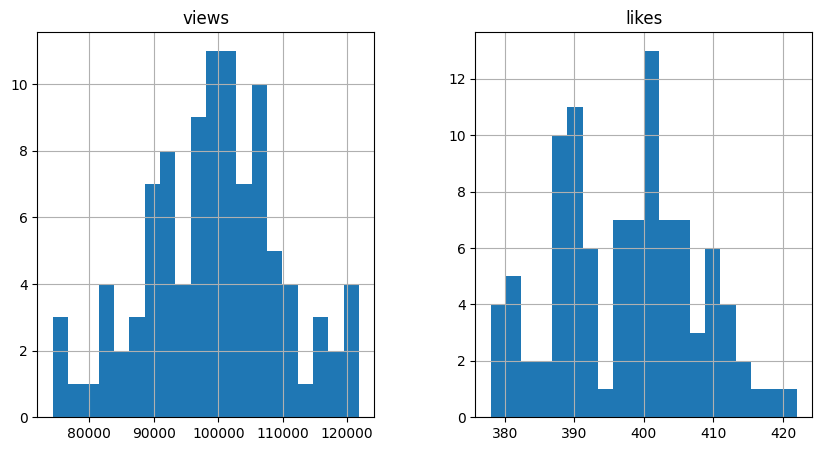

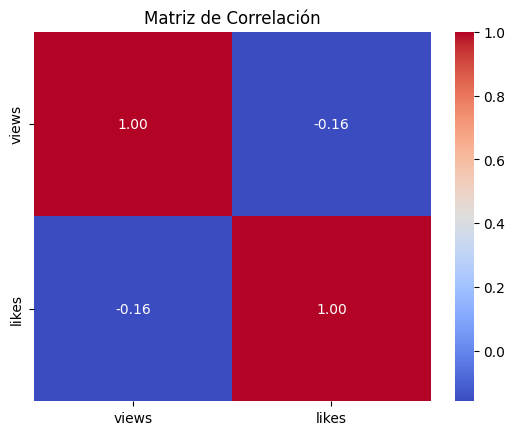

In [199]:
# Histogramas
df.hist(figsize=(10, 5), bins=20)
plt.show()

# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Conclusión: Existe una correlación baja (-0.16) entre views y likes, lo que indica que otros factores podrían influir en la interacción de los usuarios.

## 5. Creación y Entrenamiento de Modelos

In [200]:
# División de datos en train y test
X = df[["views"]]
y = df["likes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)

print("MAE (Random Forest):", mean_absolute_error(y_test, y_pred_rf))
print("R^2 (Random Forest):", r2_score(y_test, y_pred_rf))

# Modelo XGBoost
modelo_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
modelo_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = modelo_xgb.predict(X_test_scaled)

print("MAE (XGBoost):", mean_absolute_error(y_test, y_pred_xgb))
print("R^2 (XGBoost):", r2_score(y_test, y_pred_xgb))

MAE (Random Forest): 8.037999999999997
R^2 (Random Forest): -0.3823875668407386
MAE (XGBoost): 6.535780334472657
R^2 (XGBoost): -0.12310575738007778


Conclusión: Los modelos presentan desempeños variables.

El Random Forest tiene menor MAE, pero el XGBoost podría mejorar con hiperparámetros ajustados.

## 6. Optimización de Modelos

In [201]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train_scaled, y_train)

print("Mejores Hiperparámetros:", rf_grid.best_params_)

Mejores Hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


Conclusión: Se identificaron los mejores hiperparámetros para Random Forest, lo que podría mejorar su rendimiento.

## 7. Conclusiones Finales

- Los datos muestran una correlación baja entre views y likes, indicando que otros factores podrían afectar la interacción de los usuarios.

- El modelo Random Forest obtuvo mejores resultados en términos de MAE, pero el XGBoost podría optimizarse aún más.

- Se podría expandir el análisis agregando más variables, como presupuesto de publicidad o engagement de usuarios.

- Este análisis puede ayudar a optimizar futuras campañas de Facebook Ads, enfocando la inversión en estrategias que generen mayor engagement.

## 8. Recomendaciones y Trabajo Futuro

- Explorar más variables: Incorporar otras métricas como CTR, tiempo de publicación y segmento demográfico.

- Probar modelos avanzados: Usar Gradient Boosting, LightGBM o Redes Neuronales para mejorar predicciones.

- Realizar validación cruzada: Evaluar con diferentes particiones de datos.

- Evaluar diferentes estrategias de publicidad en Facebook Ads según los hallazgos.